# MPG DATA SET #

## IMPORT MODULES ##

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
import statsmodels.formula.api as sm
import math
from pandas.stats.api import ols
from sklearn.preprocessing import scale
from sklearn.metrics import mean_squared_error
import sklearn.model_selection as m_sel
import plotly.offline as plot
import plotly.graph_objs as go
from sklearn import preprocessing
from sklearn.utils import shuffle
plot.offline.init_notebook_mode(connected=True)

## LOAD DATA ##

In [2]:
data_df = pd.read_csv('/home/user/Downloads/Ex04_Mpg_Regression.csv')
data_df = shuffle(data_df)
data_df.horsepower = pd.to_numeric(data_df.horsepower, errors=np.NaN)
data_df.dropna(axis = 0, inplace=True)
data_df.drop('carname',axis = 1, inplace=True)

## CORRELATION MTRIX ##

In [3]:
correlation_matrix = data_df.corr()
correlation_matrix

,mpg,cylinders,displacement,horsepower,weight,acceleration,modelyear,origin
mpg,1.000000,-0.777643,-0.804899,-0.778165,-0.832065,0.422188,0.579960,0.564652
cylinders,-0.777643,1.000000,0.950824,0.843315,0.898146,-0.502281,-0.341595,-0.568186
displacement,-0.804899,0.950824,1.000000,0.897265,0.933129,-0.542209,-0.367163,-0.613875
horsepower,-0.778165,0.843315,0.897265,1.000000,0.864397,-0.688857,-0.415239,-0.454509
weight,-0.832065,0.898146,0.933129,0.864397,1.000000,-0.415883,-0.307733,-0.584540
acceleration,0.422188,-0.502281,-0.542209,-0.688857,-0.415883,1.000000,0.286547,0.210975
modelyear,0.579960,-0.341595,-0.367163,-0.415239,-0.307733,0.286547,1.000000,0.179273
origin,0.564652,-0.568186,-0.613875,-0.454509,-0.584540,0.210975,0.179273,1.000000


## CORRELATION GRAPH ##

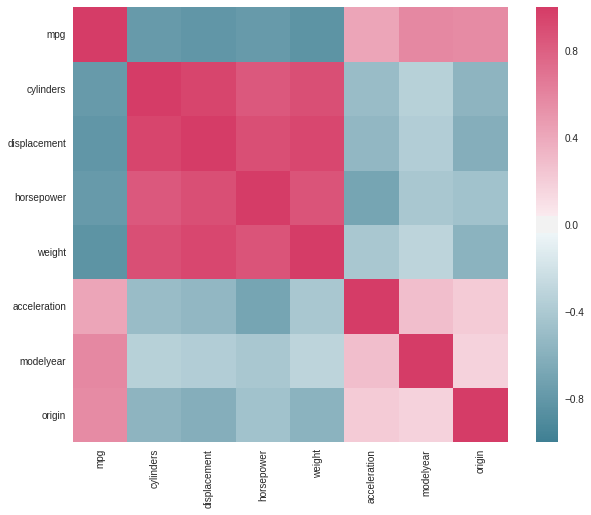

In [4]:
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(correlation_matrix, mask=np.zeros_like(correlation_matrix, dtype=np.bool), cmap=sns.diverging_palette(220, 1, as_cmap=True),
            square=True, ax=ax)
plt.show()

## SCATTER GRAPH ##

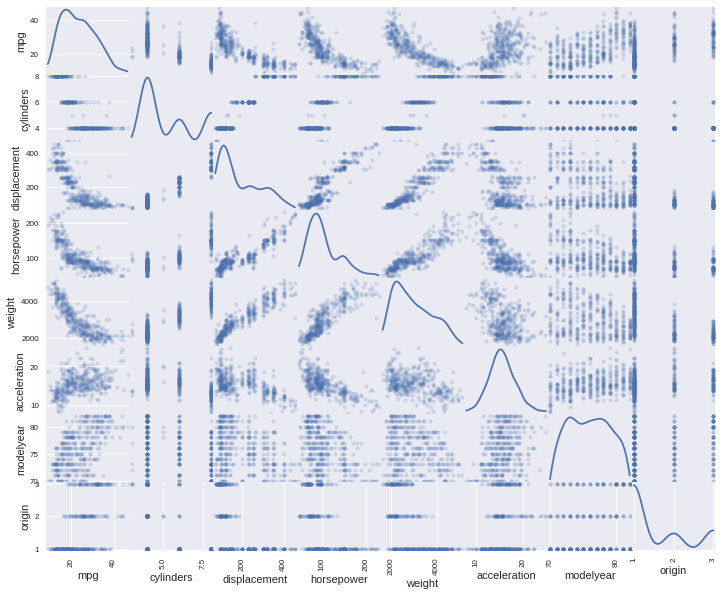

In [5]:
pd.scatter_matrix(data_df, alpha=.2, figsize=(12,10), diagonal='kde')
plt.show()

## NORMALIZING DATA ##

In [6]:
data_norm=data_df
for i in data_norm.columns.tolist():
    data_norm[i] = (data_norm[i] - data_norm[i].mean())/(data_norm[i].var())

## SPLITTING TRAINING AND TESTING DATA ##

In [7]:
X_rl = pd.get_dummies(data_norm).drop('mpg', axis=1)
y_rl = data_norm.mpg
X_train, X_test , Y_train, Y_test = m_sel.train_test_split(X_rl, y_rl, test_size=0.30, random_state=20)

## LINEAR REGRESSION MODEL ##

In [8]:
reg = linear_model.LinearRegression(normalize=True)
reg.fit(X_train, Y_train)
print ('Coefficients : ', reg.coef_) 
print ('\nIntercepts  : ', reg.intercept_)
print ('\nRoot Mean Square Error : ', math.sqrt(np.mean((reg.predict(X_test) - Y_test) ** 2)))

Coefficients :  [ -1.28083321e-02   4.50237882e+00   2.09039823e-01  -1.00986107e+02
   2.47693601e-02   1.85993441e-01   1.27549343e-02]

Intercepts  :  0.000953439864304

Root Mean Square Error :  0.05718540548188898


## REGRESSION MODEL PLOT ##

In [9]:
trace1 = go.Scatter(
    x=reg.predict(X_test),
    y= Y_test,
    mode='markers',
    name = 'Predicted vs Original',
    line=dict(shape='linear')
)
trace2 = go.Scatter(
    x= Y_test,
    y= Y_test,
    mode='lines',
    name = 'x = y',
    line=dict(shape='linear')
)
data = [trace1, trace2]
layout = dict(
    title='SCATTER PLOT FOR REGRESSION MODEL',
    xaxis=dict(
        title='PREDICTED VALUE '
    ),
    yaxis=dict(
        title='ORIGINAL VALUE'
    ),
    legend=dict(
        traceorder='reversed',
        font=dict(size=16)
    )
)
fig = dict(data=data, layout=layout)
plot.iplot(fig, filename='MPG_Regression Model')


## HISTOGRAM FOR REGRESSION ##

In [10]:
data = [go.Histogram(x=((reg.predict(X_test) - Y_test)))]
layout = go.Layout(
    title='FREQUENCY OF RESIDUALS',
    xaxis=dict(
        title='RESIDUALS'
    ),
    yaxis=dict(
        title='FREQUENCY'
    )
)
fig = go.Figure(data=data, layout=layout)
plot.iplot(fig, filename='histogram')

## BOX PLOT FOR REGRESSION ##

In [11]:
trace1 = go.Box(
    y = (reg.predict(X_test) - Y_test)
)
data = [trace1]
plot.iplot(data)

## RIDGE REGRESSION ##

In [12]:
alphas = np.logspace(-3,3,300)
ridge = linear_model.Ridge(normalize=True)
coefs = []
mean_errors = []

column_name1 = X_train.columns.tolist()
column_name = column_name1
column_name.append('alpha')
df = pd.DataFrame(index=list(range(len(alphas))),columns=column_name)
s = 0
for a in alphas:
    ridge.set_params(alpha=a)
    ridge.fit(X_train,Y_train)
    coefs.append(ridge.coef_)
    pred = ridge.predict(X_test) 
    mean_errors.append(mean_squared_error(Y_test, pred))
    k=0
    while (k < len(column_name)-1):
        df.loc[s,list(df.columns)[k]] = ridge.coef_[k]
        k = k+1
    df.loc[s,'alpha'] =a    
    s=s+1
m=column_name1.pop()    

## WEIGHT VS ALPHAS ## 

In [13]:
data = []
for i in column_name1:
    p = go.Scatter(x= df.alpha, y= df.loc[:,i].tolist(), mode='lines+markers', name=i, hoverinfo='name', line=dict(shape='linear'))
    data.append(p)        
layout = dict(
     title='WEIGHTS VS ALPHAS',
    xaxis=dict(
        title='ALPHAS'
    ),
    yaxis=dict(
        title='WEIGHTS'
    ),
    legend=dict(
        traceorder='reversed',
        font=dict(size=16)
    )
)
fig = dict(data=data, layout=layout)
plot.iplot(fig, filename='WEIGHTS_VS_ALPHAS_MPG')

## MEAN ERROR VS ALPHA ##

In [14]:
data = []
p = go.Scatter(x= alphas, y=mean_errors, mode='lines+markers', name='Mean Error', hoverinfo='name', line=dict(shape='linear'))
data.append(p)        
layout = dict(
    title='MEAN SQUARE ERROR VS ALPHAS',
    xaxis=dict(
        title='ALPHAS'
    ),
    yaxis=dict(
        title='MEAN SQUARE ERROR'
    ),
    legend=dict(
        traceorder='reversed',
        font=dict(size=16)
    )
)
fig = dict(data=data, layout=layout)
plot.iplot(fig, filename='MEANERROR_VS_APLHA_MPG')

## LASSO ##

In [49]:
lasso = linear_model.Lasso(max_iter=10000, normalize=True)
coefs = []
for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit((X_train), Y_train)
    coefs.append(lasso.coef_)
coefs = np.array(coefs)    

## WEIGHT VS ALPHA ##

In [55]:
data = []
for beta in range(len(X_train.columns)):
    trace = go.Scatter(
        x = alphas,
        y = coefs[:,beta],
        mode='lines+markers',
        name = X_train.columns[beta],
        line=dict(shape='linear')
    )
    data.append(trace)
layout = dict(
    title='WEIGHTS VS ALPHAS',
    yaxis = dict(
        range = [-3,3],
        title='WEIGHT'
    ),
    xaxis = dict(
        range = [0,0.01],
        title='ALPHAS'
    ),
    legend=dict(
        traceorder='reversed',
        font=dict(size=16)
    ))

fig = dict(data=data, layout=layout)
plot.iplot(fig, filename='WEIGHT_VS_ALPHA_MPG')

## LASSO CV ##

In [57]:
lassocv = linear_model.LassoCV(alphas=None, cv=10, max_iter=100000, normalize=True)
lassocv.fit(X_train, Y_train)
lasso.set_params(alpha=lassocv.alpha_)
lasso.fit(X_train, Y_train)
mean_squared_error(Y_test, lasso.predict(X_test))

0.0031196242820848894

In [58]:
pd.Series(lasso.coef_, index=X_test.columns)

cylinders       -0.011261
displacement     0.000000
horsepower      -0.000000
weight         -64.518924
acceleration     0.002893
modelyear        0.163394
origin           0.015556
dtype: float64

## OLS_REGRESSION ##

In [60]:
ols_result = sm.ols(formula="mpg ~ displacement", data = data_norm.iloc[:math.floor(len(data_norm)*0.70),:]).fit()
ols_result.params
predict_ols = ols_result.predict(X_test)
ols_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.678
Model:                            OLS   Adj. R-squared:                  0.676
Method:                 Least Squares   F-statistic:                     569.4
Date:                Sat, 01 Apr 2017   Prob (F-statistic):           1.46e-68
Time:                        12:27:18   Log-Likelihood:                 325.69
No. Observations:                 273   AIC:                            -647.4
Df Residuals:                     271   BIC:                            -640.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.0013      0.004      0.285      0.776      -0.008       0.010
displacement   -11.0198      0.462    -23.863      0.000     -11.929     -10.111
==============================================================================
Omnibus:                       26.697   Durbin-Watson:                   2.103
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               38.404
Skew:                           0.642   Prob(JB):                     4.58e-09
Kurtosis:                       4.315   Cond. No.                         104.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## SCATTER PLOT FOR OLS ##

In [62]:
trace1 = go.Scatter(
    x=predict_ols,
    y= Y_test,
    mode='markers',
    name = 'PREDICTED VS ORIGINAL',
    line=dict(shape='linear')
)
trace2 = go.Scatter(
    x= Y_test,
    y= Y_test,
    mode='lines',
    name = 'x = y',
    line=dict(shape='linear')
)
data = [trace1, trace2]
layout = dict(
    title='PREDICTED VS ORIGINAL',
    yaxis = dict(
        title='PREDICTED VALUE'
    ),
    xaxis = dict(
        title='ORIGINAL VALUE'
    ),
    legend=dict(
        traceorder='reversed',
        font=dict(size=16)
    )
)
fig = dict(data=data, layout=layout)
plot.iplot(fig, filename='SCATTER PLOT FOR OLS')


## HISTOGRAM FOR OLS ##

In [64]:
data = [go.Histogram(x=((predict_ols - Y_test)))]
layout = go.Layout(
    title='FREQUENCY OF RESIDUALS',
    xaxis=dict(
        title='RESIDUALS'
    ),
    yaxis=dict(
        title='FREQUENCY'
    )
)
fig = go.Figure(data=data, layout=layout)
plot.iplot(fig, filename='OLS_HISTOGRAM_MPG')

## BOXPLOT FOR OLS ##

In [66]:
trace1 = go.Box(
    y = (predict_ols - Y_test)
)
data = [trace1]
plot.iplot(data)